In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Importing the Datasetdf=pd.read_csv('Housing.csv')
df=pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
#Checking Data Shape
df.shape

(545, 13)

In [4]:
#Checking Data Types
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [5]:
#Checking for Missing Values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
#if null values present replace with mean/mode values


#assuming  area has null values 

df['area'].fillna(df['area'].mean(),inplace=True)


#if column datatype is object
mode_value=df['mainroad'].mode()[0]
df['mainroad'].fillna(mode_value,inplace= True)

C:\Users\Naresh Damera\AppData\Local\Temp\ipykernel_10272\2764269469.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['area'].fillna(df['area'].mean(),inplace=True)
C:\Users\Naresh Damera\AppData\Local\Temp\ipykernel_10272\2764269469.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [7]:
#Defining Features (X) and Target (y)
X=df.drop('price',axis=1)  #1 means column, 0 for column
y=df['price']
print(X)
print(y)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

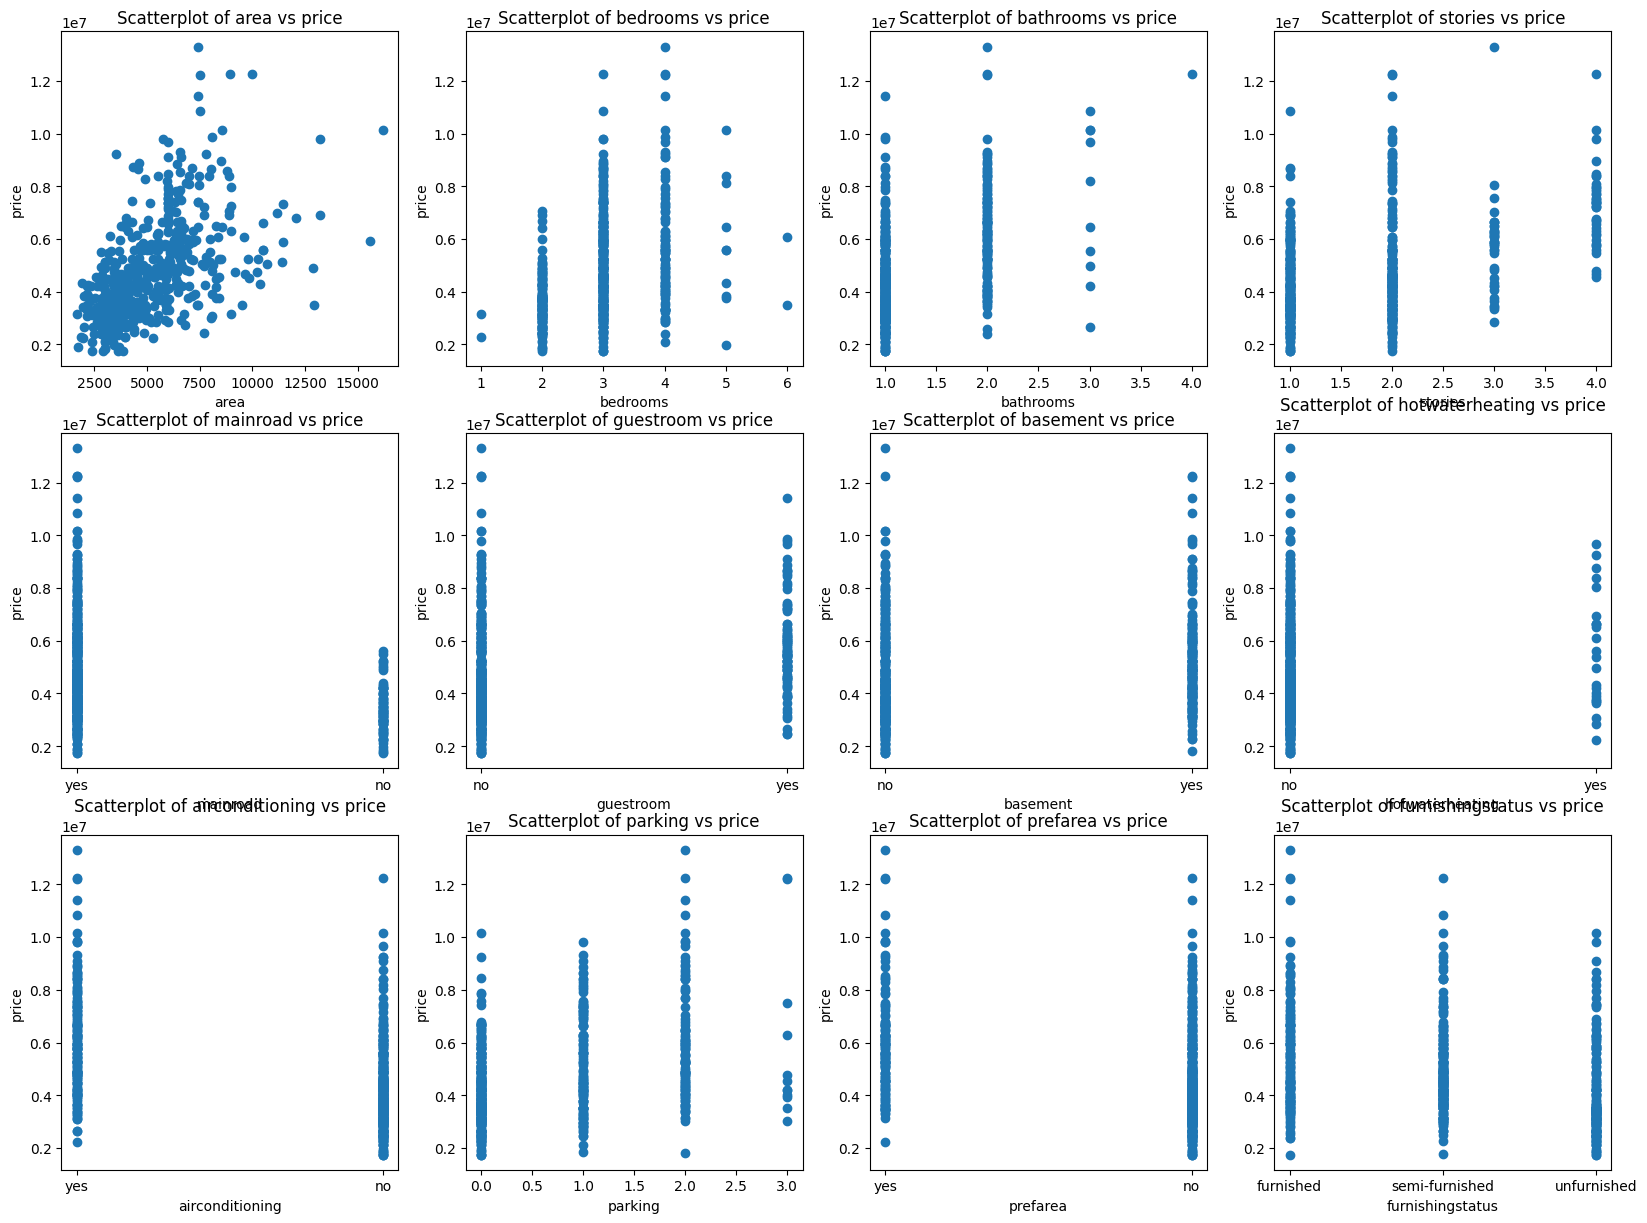

In [8]:
#Data Visualization
x_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning', 'parking', 
'prefarea', 'furnishingstatus']
y_vars = 'price'
plt.figure(figsize=(20, 20))
for i, vars in enumerate(x_vars):
    plt.subplot(4, 4, i+1)
    plt.scatter(df[vars], df[y_vars])
    plt.xlabel(vars)
    plt.ylabel('price')
    plt.title('Scatterplot of ' + vars + ' vs price')
plt.show()

In [9]:
sample=['area']
df[[sample[0]]]
# df[sample]

,area
0,7420
1,8960
2,9960
3,7500
4,7420
...,...
540,3000
541,2400
542,3620
543,2910


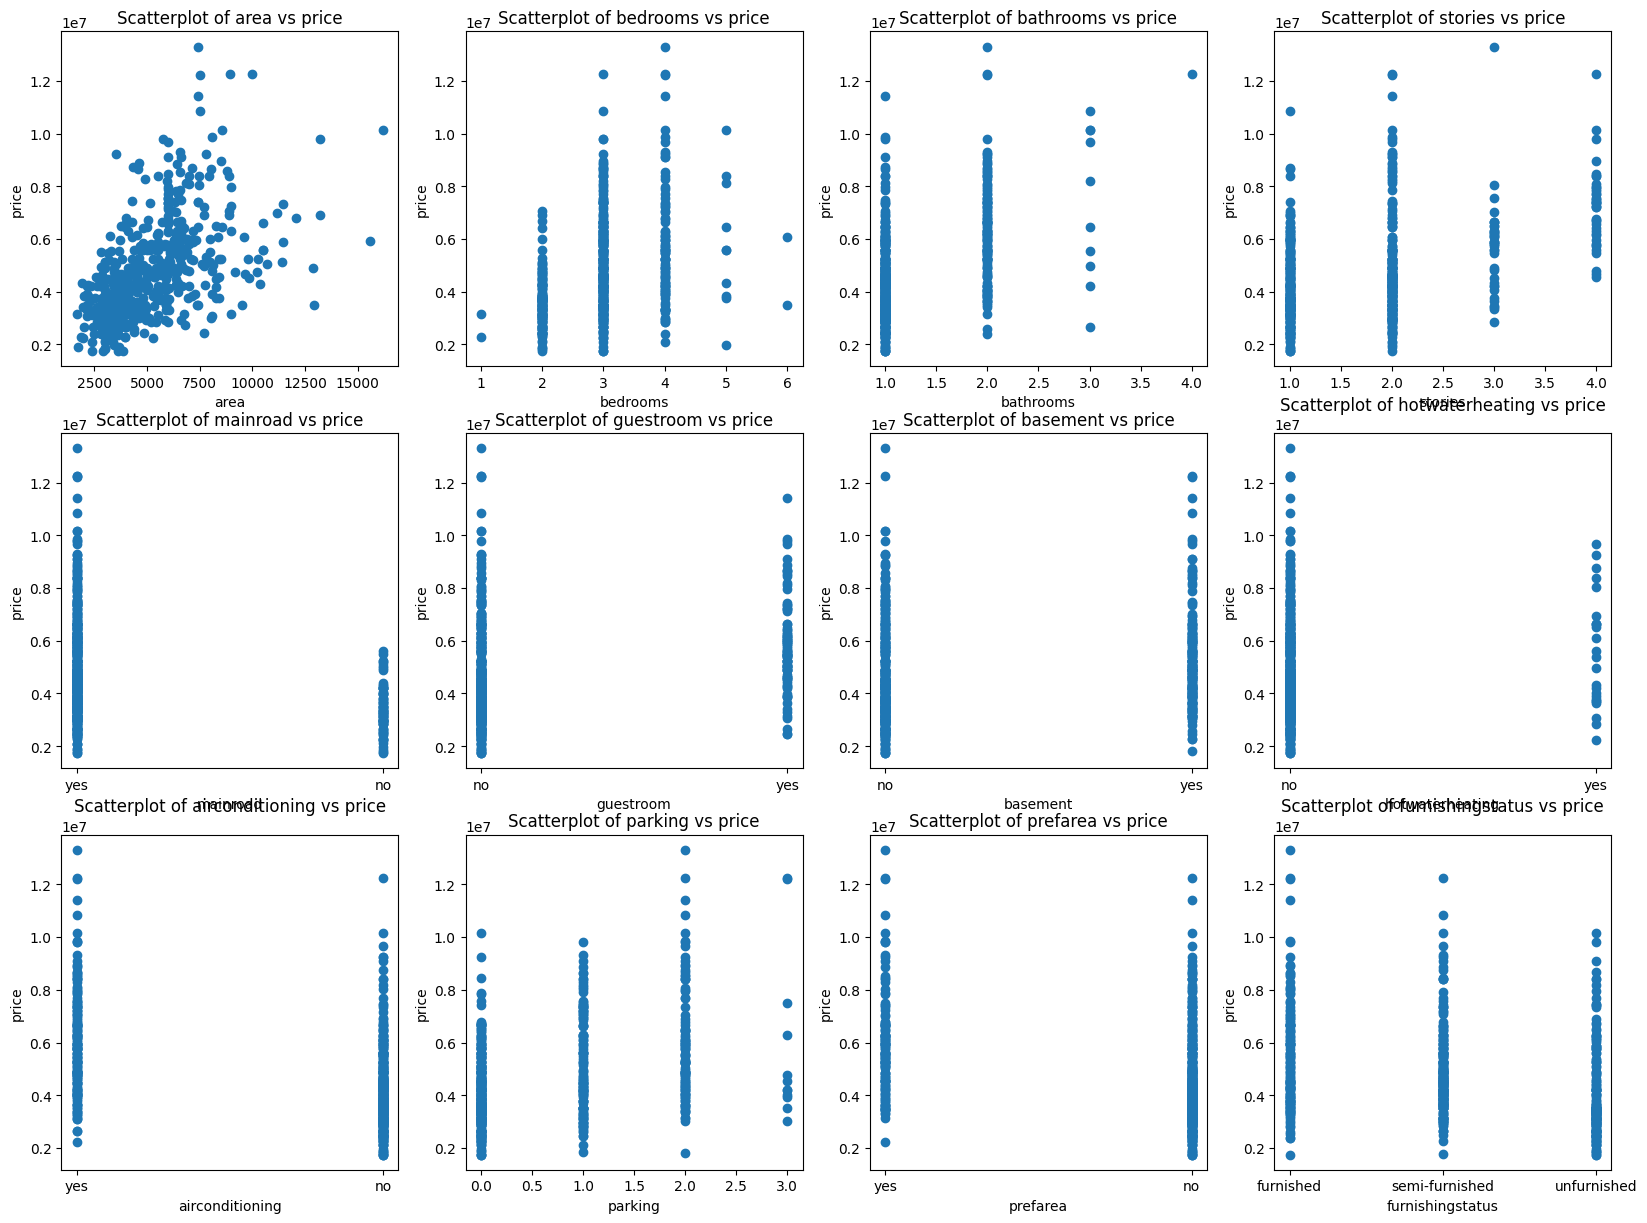

In [13]:
x_var=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning', 'parking', 
'prefarea', 'furnishingstatus']
y_var=['price']
plt.figure(figsize=(20,20))
for i in range(len(x_var)):
  plt.subplot(4,4,i+1)
  plt.scatter(df[x_var[i]],df[y_var])
  plt.xlabel(x_vars[i])
  plt.ylabel('price')
  plt.title(f'Scatterplot of {x_vars[i]} vs price')
  

In [16]:
df[x_var[6]]

0       no
1       no
2      yes
3      yes
4      yes
      ... 
540    yes
541     no
542     no
543     no
544     no
Name: basement, Length: 545, dtype: object

In [19]:
# Converting Categorical Variables
X=df.drop(columns=['price'],axis=1)
y=df['price']


In [21]:
X = pd.get_dummies(X, drop_first=True)
X

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [ ]:
#Step 8: Splitting the Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8, random_state=45)
print(X_train.shape)


(436, 13)
(545, 13)


In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [41]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)
# print(X_train)
# print(y_test)

(109, 13)
(109,)
(436, 13)
(436,)


In [43]:
y_pred=model.predict(X_test)




In [45]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mse =",mse," r2_score= ",r2)

mse = 1192976456232.704  r2_score=  0.6008076871105277
